A Notebook for processing experimental results.

All runs correspond to a folder in `outputs/` from which we can load config information and results from json data.

In [ ]:
outputs_folder = 'outputs'
#outputs_folder = 'outputs-llama3.1-8b'

In [34]:
import json
from pathlib import Path
import pandas as pd

In [35]:
# Set this to filter runs based on the cfg.experiment_name argument
experiment_name = None

# It can be a list like this:
# experiment_name = ["pythia-small", "pythia-big"]

In [36]:
def load_experiment_data(experiment_name=None, base_folder="outputs"):
    """
    Load experiment data from JSON files and return a processed DataFrame.
    
    Args:
        experiment_name (str or list, optional): Name(s) of experiment(s) to filter for.
                                               If None, loads all experiments.
        base_folder (str, optional): Base path containing experiment outputs.
                                   Defaults to "outputs".
    
    Returns:
        pandas.DataFrame: Processed DataFrame containing experiment results
    """
    from pathlib import Path
    import json
    import pandas as pd
    
    folder_path = Path(base_folder)
    json_list = []
    
    # Convert single experiment name to list for consistent processing
    if isinstance(experiment_name, str):
        experiment_name = [experiment_name]
    
    # Iterate through all JSON files in subdirectories
    for json_file in folder_path.glob("*/*.json"):
        with open(json_file, "r", encoding="utf-8") as f:
            try:
                # Load the JSON content
                json_content = json.load(f)
                
                # Filter by experiment name if specified
                if experiment_name is not None:
                    if ("cfg_experiment_name" in json_content and 
                        json_content["cfg_experiment_name"] in experiment_name):
                        json_list.append(json_content)
                else:
                    json_list.append(json_content)
            except json.JSONDecodeError:
                print(f"Warning: Could not parse JSON file: {json_file}")
                continue
    
    if not json_list:
        raise ValueError(f"No data found for experiment(s): {experiment_name}")
    
    # Sort by time, increasing
    json_list = sorted(json_list, key=lambda x: x["time"])
    
    # Convert to DataFrame
    df = pd.DataFrame(json_list)
    
    # Add derived columns
    df["ratio"] = df["target_length"] / df["num_free_tokens"]
    df["memorized"] = df["ratio"] > 1
    df.loc[df["success"] == False, "memorized"] = False
    
    # Sort by multiple columns
    df = df.sort_values(by=["cfg_model_name", "cfg_dataset", 
                           "cfg_data_idx", "cfg_discrete_optimizer"])
    
    df.head().round(2)
    return df

In [37]:
df = load_experiment_data(experiment_name=experiment_name, base_folder=outputs_folder)
# print the full dataframe (without ... truncation)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df


,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,free_token_slice,input_slice,target_slice,loss_slice,num_free_tokens,input_ids,cfg_batch_size,cfg_chat_template,cfg_use_binary_search,cfg_data_idx,cfg_dataset,cfg_discrete_optimizer,cfg_experiment_name,cfg_input_str,cfg_lr,cfg_max_tokens,cfg_mini_batch_size,cfg_model_name,cfg_num_steps,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized
8,32,"Mr. and Mrs. Dursley, of number four, Privet D...",1.853843,15.174447,True,"), � Number CrossRef нат fulfilling\tfoundіти...","[0, 64]","[0, 64]","[64, 96]","[63, 95]",64.0,"[7026, 109517, 5742, 66773, 111640, 50698, 592...",100,"[, ]",True,0,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,dreary-Sheen,42,,"Mr. and Mrs. Dursley, of number four, Privet D...",250,20250214-05:31:12,0.500000,False
10,27,They were the last people you'd expect to be i...,2.418627,14.061025,True,ornings donn Milky Ax(w fluffyتن\ArrayDAspinne...,"[0, 65]","[0, 65]","[65, 92]","[64, 91]",65.0,"[52785, 33537, 89819, 26232, 3706, 68661, 1020...",100,"[, ]",True,1,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,alarmed-Timmothy,42,,They were the last people you'd expect to be i...,250,20250214-09:07:06,0.415385,False
11,20,Mr. Dursley was the director of a firm called ...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,"[, ]",True,2,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,stable-Chrysta,42,,Mr. Dursley was the director of a firm called ...,250,20250214-09:35:26,NaN,False
12,23,"He was a big, beefy man with hardly any neck, ...",NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,"[, ]",True,3,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,closed-Marlyn,42,,"He was a big, beefy man with hardly any neck, ...",250,20250214-10:21:25,NaN,False
1,32,"Mr. and Mrs. Dursley, of number four, Privet D...",1.310022,14.051073,True,"Rowlingcel start desire┐{}, direct business p...","[0, 34]","[0, 34]","[34, 66]","[33, 65]",34.0,"[96607, 3757, 1212, 12876, 116707, 23484, 2167...",100,"[, ]",True,0,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,yawning-Laronda,42,,"Mr. and Mrs. Dursley, of number four, Privet D...",250,20250214-00:06:35,0.941176,False
5,27,They were the last people you'd expect to be i...,2.387964,13.996488,True,whose hotel zak aphetre Near RowlingFetcher.A...,"[0, 54]","[0, 54]","[54, 81]","[53, 80]",54.0,"[6832, 9689, 51415, 89111, 47987, 31494, 96607...",100,"[, ]",True,1,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,noisy-Zachory,42,,They were the last people you'd expect to be i...,250,20250214-01:38:08,0.500000,False
7,20,Mr. Dursley was the director of a firm called ...,2.283648,14.123230,True,goal vocational 취RDD이Didndictions&eacuteläodel...,"[0, 63]","[0, 63]","[63, 83]","[62, 82]",63.0,"[35039, 89486, 107545, 98168, 13094, 87619, 53...",100,"[, ]",True,2,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/2/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/2/standard/...,200,adam,False,safe-Jaisa,42,,Mr. Dursley was the director of a firm called ...,250,20250214-03:45:57,0.317460,False
9,23,"He was a big, beefy man with hardly any neck, ...",2.261226,14.375685,True,dissemination office achievementuppies�Ware e...,"[0, 72]","[0, 72]","[72, 95]","[71, 94]",72.0,"[87764, 5274, 26501, 95847, 105, 72870, 116038...",100,"[, ]",True,3,obliviate-hp,gcg,/datadrive2/unmemorize/experimen

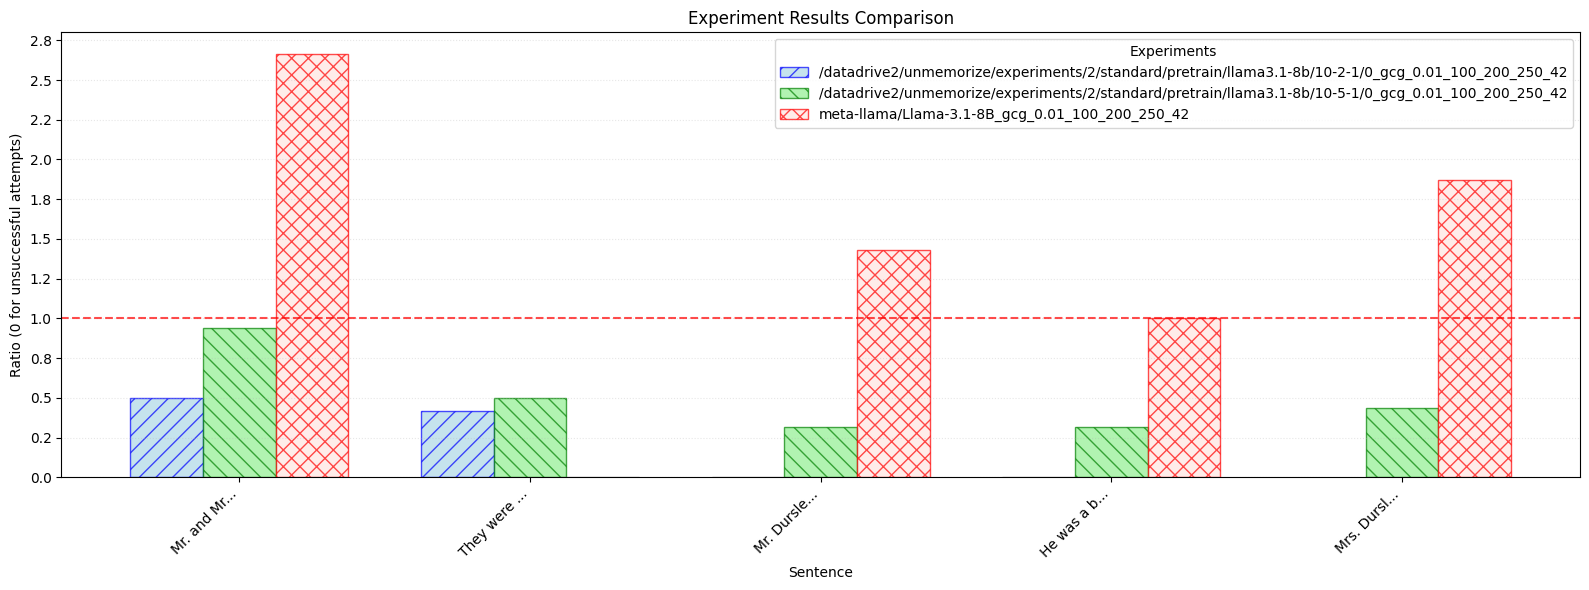

In [38]:
def plot_experiment_results(df):
    """
    Plot ratio values as narrow hatched bars for multiple experiments with reduced spacing.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Get unique experiments and create style mappings
    experiments = df['cfg_experiment_name'].unique()
    n_experiments = len(experiments)
    
    # Define visual styles for each experiment
    styles = [
        {'hatch': '//', 'edge': 'blue', 'face': 'lightblue'},
        {'hatch': '\\\\', 'edge': 'green', 'face': 'lightgreen'},
        {'hatch': 'xx', 'edge': 'red', 'face': 'mistyrose'},
        {'hatch': '++', 'edge': 'purple', 'face': 'lavender'},
        {'hatch': '--', 'edge': 'orange', 'face': 'bisque'}
    ]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Width settings - significantly reduced spacing
    bar_width = 0.01  # Reduced from 0.015
    group_spacing = 0.04  # Reduced from 0.12 to maintain 6x bar width ratio
    
    # Keep track of legend handles
    legend_handles = []
    
    # Find the maximum number of points across all experiments
    max_points = 0
    all_target_strs = []
    
    for experiment in experiments:
        exp_df = df[df['cfg_experiment_name'] == experiment].sort_values('time')
        max_points = max(max_points, len(exp_df))
        all_target_strs.extend(exp_df['target_str'].tolist())
    
    # Create labels using all unique target strings
    unique_targets = pd.unique(all_target_strs)
    labels = [str(s)[:10] + "..." for s in unique_targets]
    
    # Plot each experiment
    for i, (experiment, style) in enumerate(zip(experiments, styles)):
        exp_df = df[df['cfg_experiment_name'] == experiment].sort_values('time')
        ratios = [row.ratio if row.success else 0 for _, row in exp_df.iterrows()]
        
        # Calculate x positions with reduced spacing
        x = np.arange(len(ratios)) * group_spacing
        offset = (i - n_experiments/2 + 0.5) * bar_width
        x_positions = x + offset
        
        bars = ax.bar(x_positions, ratios,
                     width=bar_width,
                     hatch=style['hatch'],
                     alpha=0.7,
                     edgecolor=style['edge'],
                     color=style['face'],
                     label=experiment)
        
        for j, (ratio, success) in enumerate(zip(ratios, exp_df['success'])):
            if not success:
                bars[j].set_facecolor('lightgray')
                bars[j].set_edgecolor('gray')
        
        legend_handles.append(bars[0])
    
    # Add horizontal line at 1.0
    ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
    
    # Set y-axis ticks at 0.25 intervals
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    
    # Customize the plot
    ax.set_title("Experiment Results Comparison", fontsize=12)
    ax.set_xlabel('Sentence', fontsize=10)
    ax.set_ylabel('Ratio (0 for unsuccessful attempts)', fontsize=10)
    
    # Add legend
    ax.legend(title="Experiments")
    
    # Set x-axis labels using the reduced spacing
    plt.xticks(np.arange(max_points) * group_spacing, labels[:max_points], rotation=45, ha='right')
    
    # Add grid
    ax.grid(True, axis='y', linestyle=':', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

plt = plot_experiment_results(df)
plt.show()

In [39]:
# Filter the rows where dataset is 'random', the model is 'EleutherAI/pythia-14m', and success is True
filtered_df = df[(df['cfg_dataset'] == 'famous_quotes') &
                 (df['cfg_model_name'] == 'EleutherAI/pythia-14m')
                 ]
filtered_df.head().round(2)

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,free_token_slice,input_slice,target_slice,loss_slice,num_free_tokens,input_ids,cfg_batch_size,cfg_chat_template,cfg_use_binary_search,cfg_data_idx,cfg_dataset,cfg_discrete_optimizer,cfg_experiment_name,cfg_input_str,cfg_lr,cfg_max_tokens,cfg_mini_batch_size,cfg_model_name,cfg_num_steps,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized


In [40]:
# Sort and dedup
df_sorted = df.sort_values(by=['cfg_model_name', 'cfg_discrete_optimizer', 'cfg_dataset', 'cfg_data_idx', 'success'], ascending=[True, True, True, True, False])
df = df_sorted.drop_duplicates(subset=['cfg_dataset', 'cfg_data_idx', 'cfg_model_name', 'cfg_discrete_optimizer'], keep='first')
df = df[df["success"] == True]

# Make summary counting the average ratio and success rate for each dataset and discrete_optimizer include counts
summary = df.groupby(["cfg_model_name", "cfg_dataset", "cfg_discrete_optimizer"]).agg(
    {"ratio": "mean", "memorized": "mean", "success": "count"}).round(2)
summary

,,,ratio,memorized,success
cfg_model_name,cfg_dataset,cfg_discrete_optimizer,,,
/datadrive2/unmemorize/experiments/2/standard/pretrain/llama3.1-8b/10-2-1/0,obliviate-hp,gcg,0.46,0.00,2
/datadrive2/unmemorize/experiments/2/standard/pretrain/llama3.1-8b/10-5-1/0,obliviate-hp,gcg,0.50,0.00,5
meta-llama/Llama-3.1-8B,obliviate-hp,gcg,1.74,0.75,4
